In [122]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy.optimize as opt
import statistics as st

# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size' : 18}
# matplotlib.rc('font', **font)

# Лабораторная работа №1
##### Ребрий Лидия Б02-307

Функция исследования времени поиска конкретной функции:

<font size=1>

```cpp
void experiment_of_function(int long long N, std::string name, bool arr_sort, bool worst){

    int long long *arr = new int long long[N];

    unsigned long long seed = time(0);
    std:: default_random_engine rng(seed);
    std:: uniform_int_distribution <int long long> dstr(-1e10, 1e10); // пределы целых чисел в массиве - (-1e10, 1e10)
    for (unsigned counter = N; counter != 0; --counter)
        arr[counter] = dstr(rng);
    if (arr_sort){
        sort(arr, N);
    }

    std:: default_random_engine rng0(2*seed);
    std:: uniform_int_distribution <unsigned long long> dstr0(0, N-1);
    for (unsigned counter = 100; counter != 0; --counter){ // значение 100 меняется в зависимости от функции
        auto begin = std:: chrono :: steady_clock :: now();
        for (unsigned cnt = 1000; cnt != 0; --cnt) // значение 1000 меняется в зависимости от функции
        // ========= функция - меняется от эксперимента ===================================
            liner_finer(arr, N, arr[dstr0(rng0)]+ worst*3*1e10);
        // ================================================================================
        auto end = std:: chrono :: steady_clock :: now();
        auto time_span = std:: chrono :: duration_cast<std:: chrono :: milliseconds >(end - begin);
        auto time = time_span.count();
            
        std::ofstream out;
        out.open(name, std::ios::app);
        out << N << ";" << time << std:: endl;
        out.close(); 
}
```

Функция сортировки - пузырьком:

<font size=1>

```cpp
void sort(int long long *arr, int long long N){
for(int long long i = 1; i != N; ++i){
	for(int long long j = 0; j != N-i; ++j){
		if(arr[j] < arr[j+1]){
			int long long temp = arr[j];
			arr[j] = arr[j+1];
			arr[j+1] = temp;
		}
	}
}  
```

### Поиск

Исследуемые функции:

<font size=1>

```cpp
void liner_finer(int long long *arr, int long long N, int long long a){
    for(int long long i=0; i != N; ++i){
        if(arr[i] == a){
            break;
        }
    }
}

void binary_finder(int long long *arr, int long long N, int long long a){
    int long long l = 0, r = N-1;
    while (r > l) {
        int long long m = (l+r)/2;
        if (arr[m] < a) {
            l = m + 1;
        } else if (arr[m] > a) {
            r = m - 1;
        } else {
            break;
        }
    }
}
```

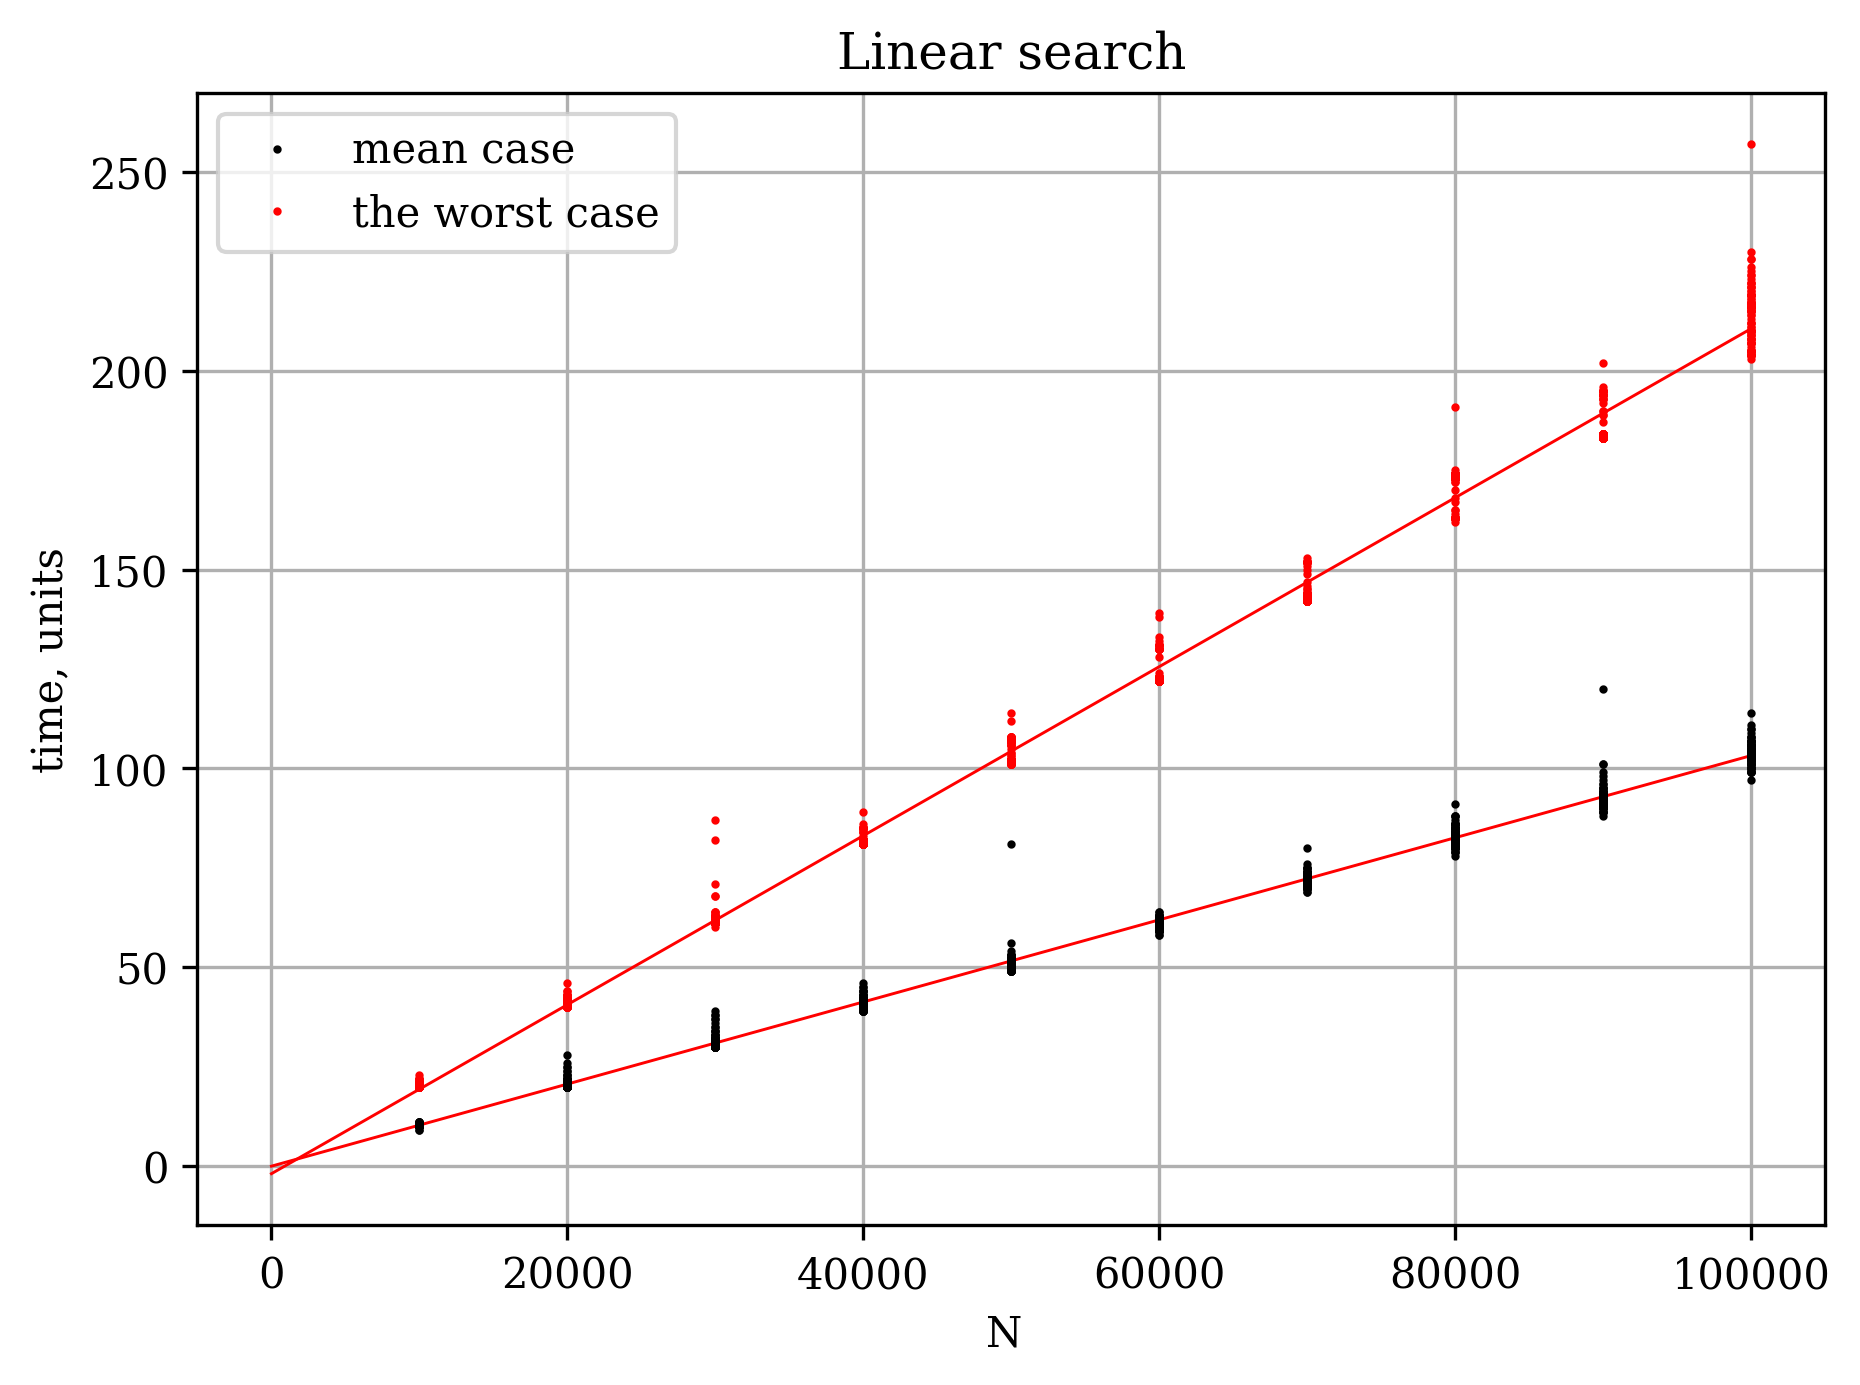

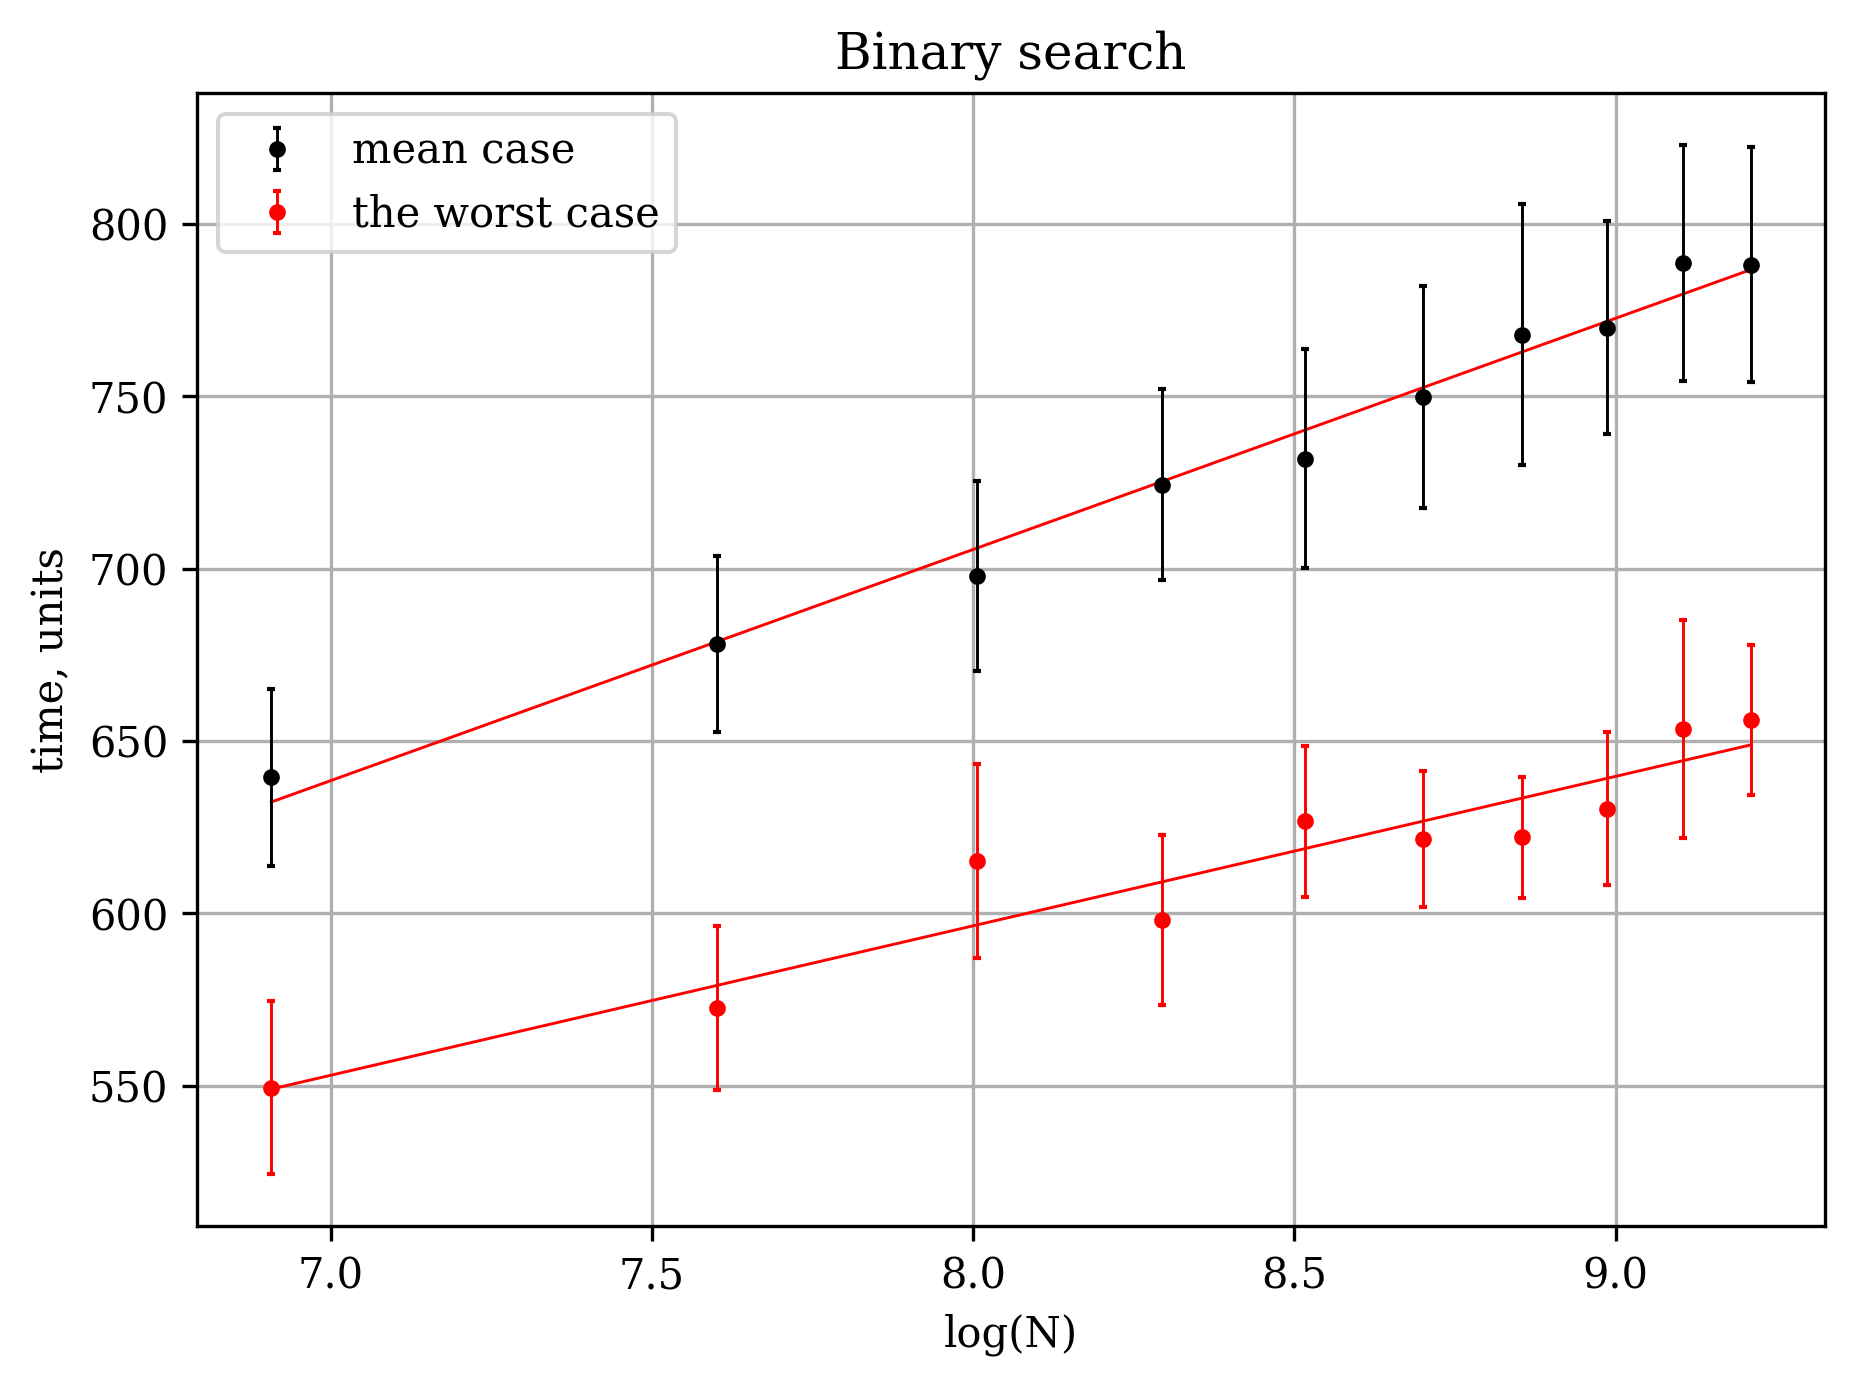

In [125]:
data_l = pd.read_csv("./one_search/line.txt", sep=";")
data_l_worst = pd.read_csv("./one_search/line_worst.txt", sep=";")

data_b = pd.read_csv("./one_search/binary.txt", sep=";")
data_b_worst = pd.read_csv("./one_search/binary_worst.txt", sep=";")

def line(x, a, b):
    return a + b*x

y_l_arr = data_l['time']
x_l_arr = data_l['N']
y_lw_arr = data_l_worst['time']
x_lw_arr = data_l_worst['N']

y_b_arr = data_b.groupby(['N']).agg({'time': ['mean', 'std']})['time']['mean']
x_b_arr = np.log(data_b.groupby(['N']).agg({'N': 'mean'})['N'])
y_b_err = data_b.groupby(['N']).agg({'time': ['mean', 'std']})['time']['std']
y_bw_arr = data_b_worst.groupby(['N']).agg({'time': ['mean', 'std']})['time']['mean']
x_bw_arr = np.log(data_b_worst.groupby(['N']).agg({'N': 'mean'})['N'])
y_bw_err = data_b_worst.groupby(['N']).agg({'time': ['mean', 'std']})['time']['std']

right_l = 0
left_l = 1e5

right_b = np.log(1e3)
left_b = np.log(1e4)

popt_l, pcov_l = opt.curve_fit(line, x_l_arr, y_l_arr)
popt_lw, pcov_lw = opt.curve_fit(line, x_lw_arr, y_lw_arr)

popt_b, pcov_b = opt.curve_fit(line, x_b_arr, y_b_arr)
popt_bw, pcov_bw = opt.curve_fit(line, x_bw_arr, y_bw_arr)

plt.figure(figsize=[7,5], dpi=300)
plt.plot(np.linspace(right_l, left_l, 100), line(np.linspace(right_l, left_l, 100), popt_l[0], popt_l[1]), lw=0.7, color='red')
plt.plot(x_l_arr, y_l_arr, ls='', marker='.', color='black', markersize=2, label = 'mean case')
plt.plot(np.linspace(right_l, left_l, 100), line(np.linspace(right_l, left_l, 100), popt_lw[0], popt_lw[1]), lw=0.7, color='red')
plt.plot(x_lw_arr, y_lw_arr, ls='', marker='.', color='red', markersize=2, label = 'the worst case')
plt.ylabel('time, units')
plt.xlabel('N ')
plt.legend()
plt.grid(True)
plt.title('Linear search')
plt.show()

plt.figure(figsize=[7,5], dpi=300)
plt.plot(np.linspace(right_b, left_b, 100), line(np.linspace(right_b, left_b, 100), popt_b[0], popt_b[1]), lw=0.7, color='red')
plt.errorbar(x=x_b_arr, y=y_b_arr, yerr=y_b_err, ls='', marker='.', color='black', markersize=6, lw=0.7, capsize=1, label = 'mean case')
plt.plot(np.linspace(right_b, left_b, 100), line(np.linspace(right_b, left_b, 100), popt_bw[0], popt_bw[1]), lw=0.7, color='red')
plt.errorbar(x=x_bw_arr, y=y_bw_arr, yerr=y_bw_err, ls='', marker='.', color='red', markersize=6, lw=0.7, capsize=1, label = 'the worst case')
plt.ylabel('time, units')
plt.xlabel('log(N)')
plt.legend()
plt.grid(True)
plt.title('Binary search')
plt.show()


*Вывод: Теоретические соотношения $O(N)$ для линейного поиска и $O(logN)$ подтвердились измерениями*

### Сумма двух

Исследуемые функции:

<font size=1>

```cpp
void sum(int long long *arr, int long long N, int long long a){
    for(int long long i=0; i != N; ++i){
        for(int long long j=0; j != N; ++j){
            if(arr[i]+arr[j] == a){
                break;
            }
        }
    }
}

void sum_sort(int long long *arr, int long long N, int long long a){
    int long long l = 0, r = N-1; 
    while (r > l){
        if (arr[l] + arr[r] < a) {
            l += 1;
        } else if (arr[l] + arr[r] > a) {
            r -= 1;
        } else {
            break;
        }
    }
}
```

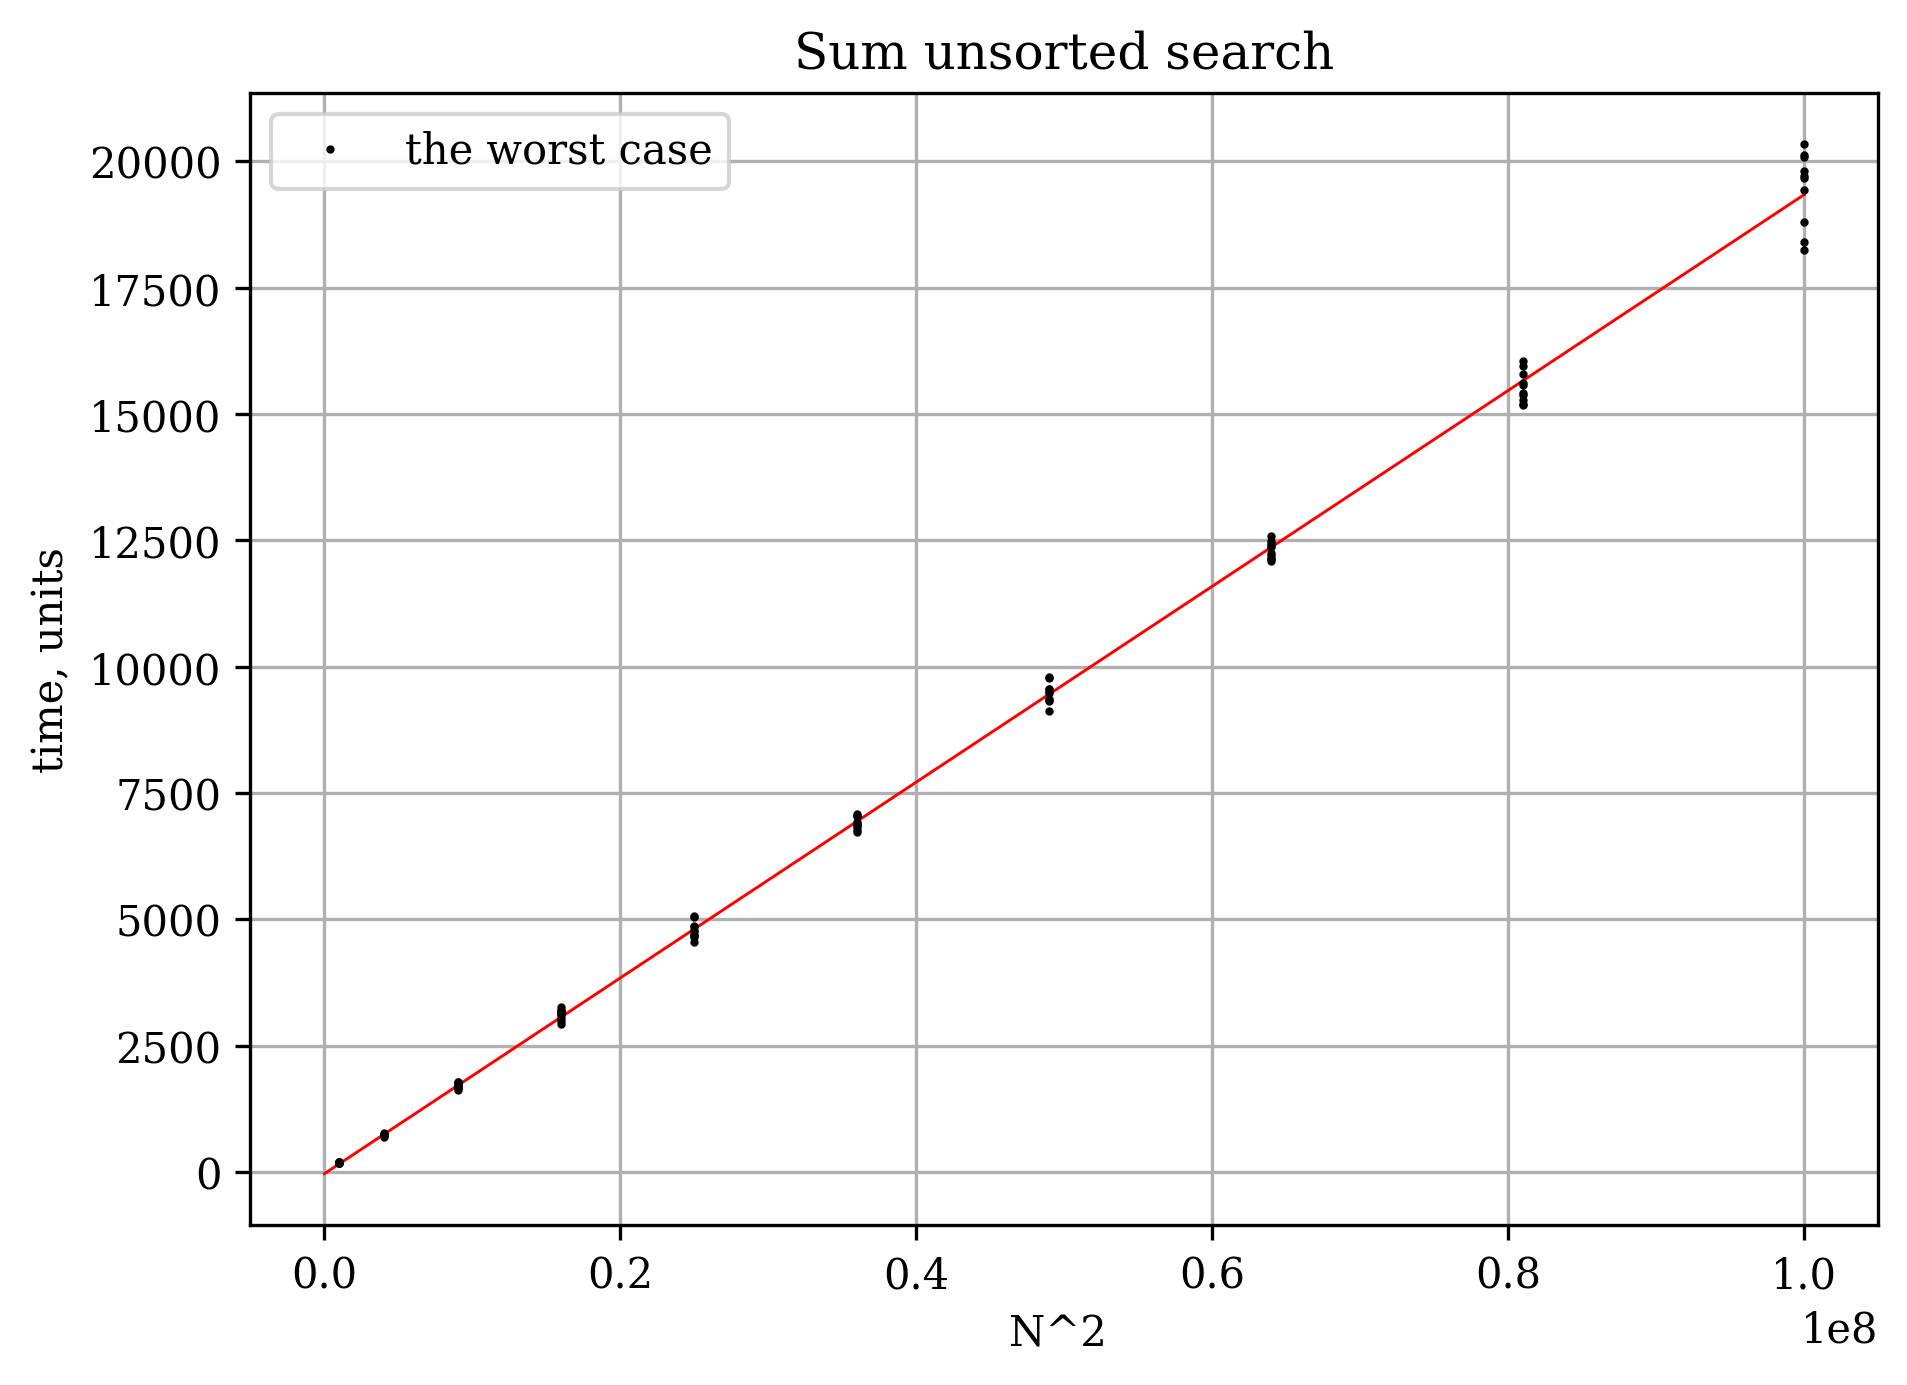

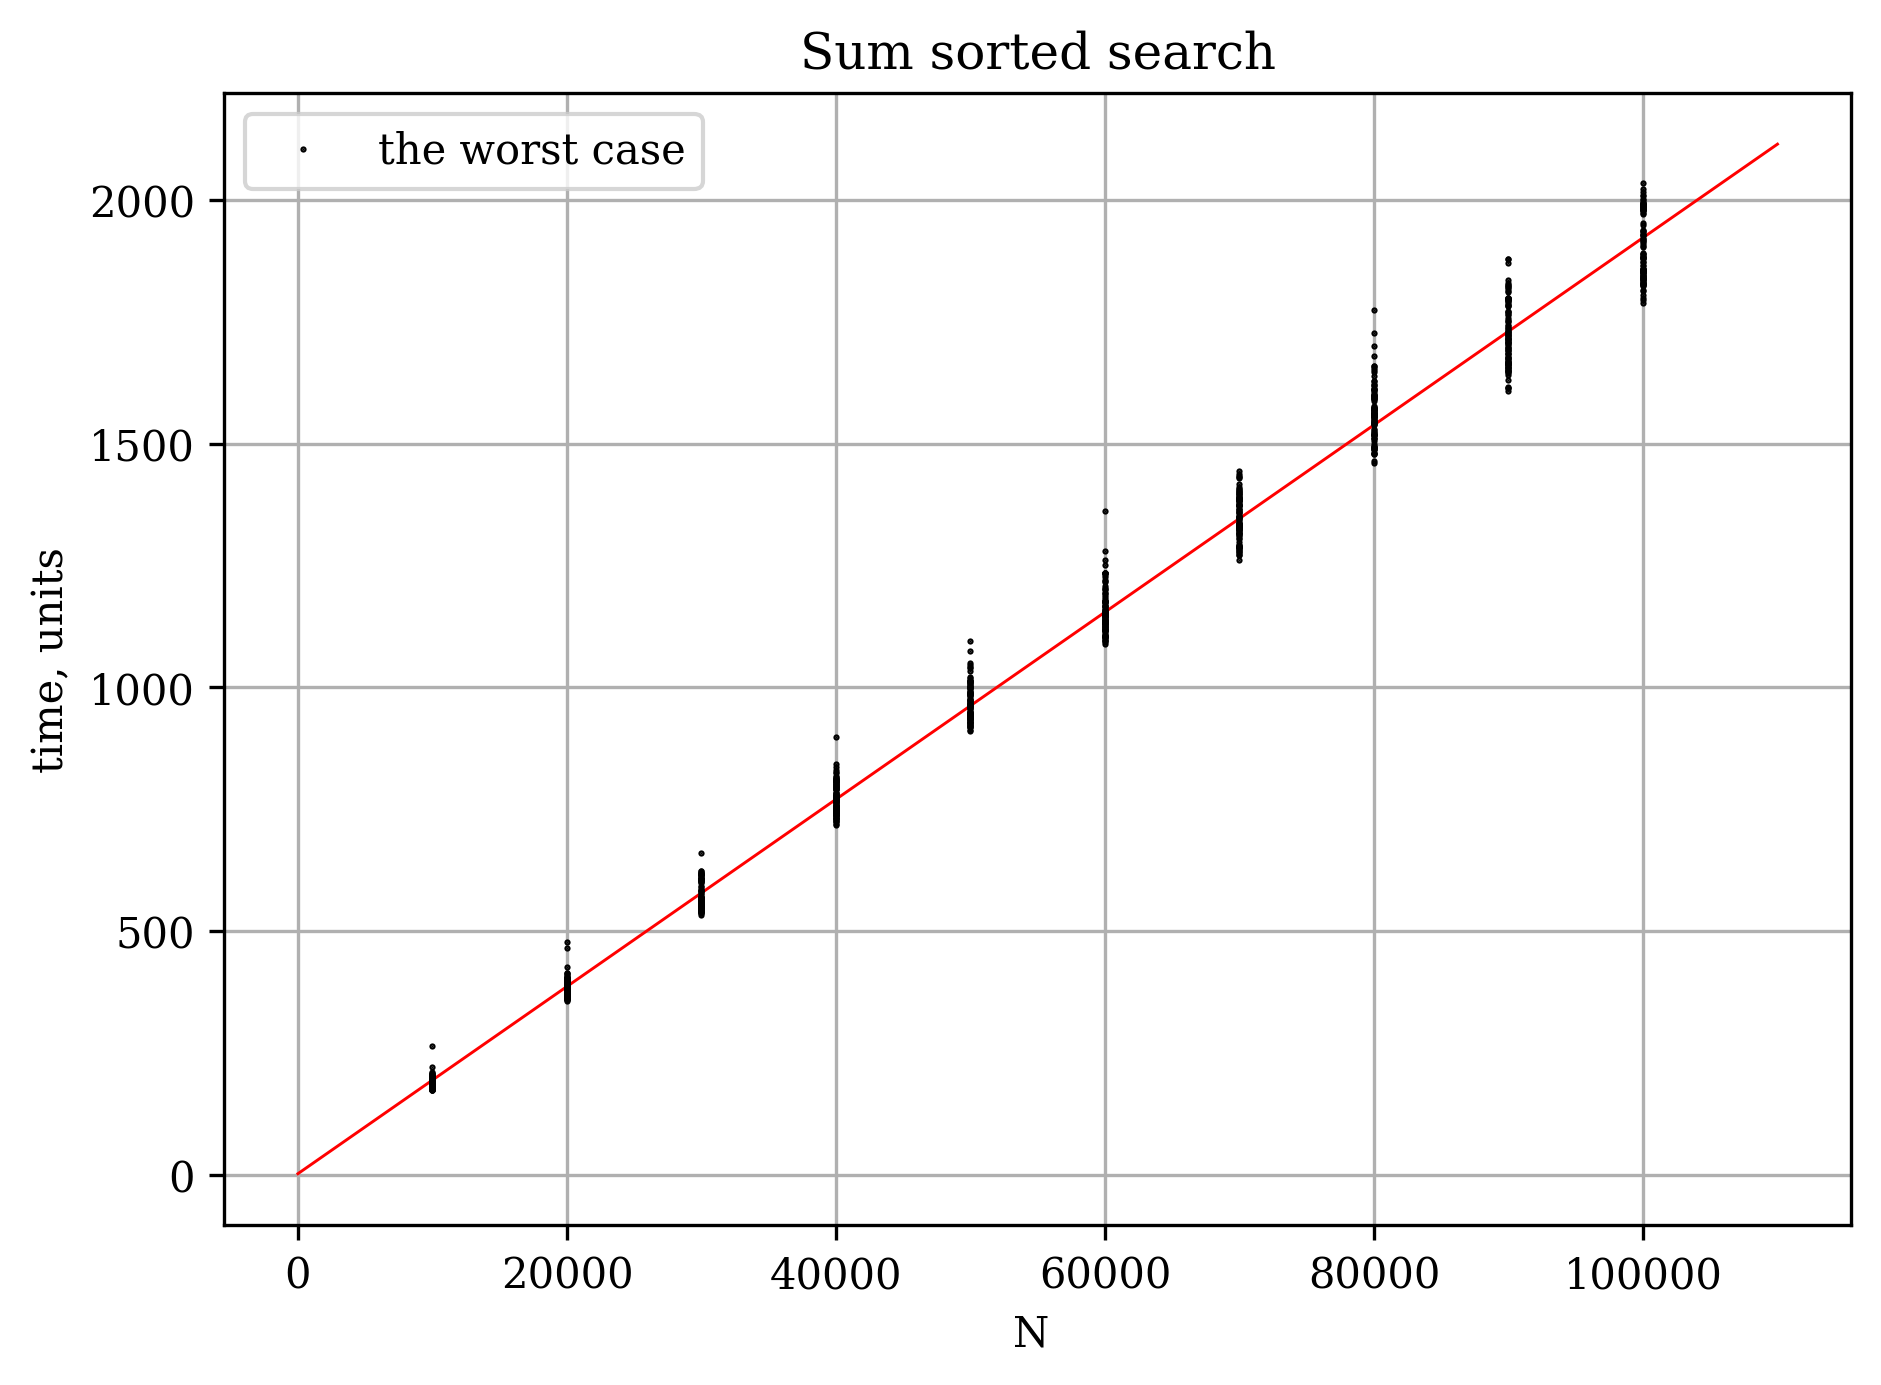

In [126]:
data_s = pd.read_csv("./two_search/sum.txt", sep=";")
data_l = pd.read_csv("./two_search/sum_sort.txt", sep=";")

def line(x, a, b):
    return a + b*x

y_s_arr = data_s['time']
x_s_arr = data_s['N']**2

y_l_arr = data_l['time']
x_l_arr = data_l['N']

right_s = 0
left_s = 1e8

right_l = 0
left_l = 1.1e5

popt_s, pcov_s = opt.curve_fit(line, x_s_arr, y_s_arr)

popt_l, pcov_l = opt.curve_fit(line, x_l_arr, y_l_arr)

plt.figure(figsize=[7,5], dpi=300)
plt.plot(np.linspace(right_s, left_s, 100), line(np.linspace(right_s, left_s, 100), popt_s[0], popt_s[1]), lw=0.7, color='red')
plt.plot(x_s_arr, y_s_arr, ls='', marker='.', color='black', markersize=2, label = 'the worst case')
plt.ylabel('time, units')
plt.xlabel('N^2 ')
plt.legend()
plt.grid(True)
plt.title('Sum unsorted search')
plt.show()

plt.figure(figsize=[7,5], dpi=300)
plt.plot(np.linspace(right_l, left_l, 100), line(np.linspace(right_l, left_l, 100), popt_l[0], popt_l[1]), lw=0.7, color='red')
plt.plot(x_l_arr, y_l_arr, ls='', marker='.', color='black', markersize=1, label = 'the worst case')
plt.ylabel('time, units')
plt.xlabel('N ')
plt.legend()
plt.grid(True)
plt.title('Sum sorted search')
plt.show()

*Вывод: Теоретические соотношения поиска суммы чисел: $O(N^2)$ в неотсортированном и $O(N)$ в отсортированном массивах подтвердились измерениями*

### Часто используемый элемент